# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
#Import all necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data -- Small tweak was needed to correctly read the data
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
#Display the contents
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.shape

(41188, 21)

In [5]:
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
#Drop all the duplicates and all values that have NA
df = df.drop_duplicates()
df = df.dropna()
df.shape

(41176, 21)

In [7]:
df.nunique()
#The y column has only 2 features and thus we are good.
#Print all the unique counts

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

In [9]:
clean_df = df.drop(columns=['campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41176 non-null  int64 
 1   job          41176 non-null  object
 2   marital      41176 non-null  object
 3   education    41176 non-null  object
 4   default      41176 non-null  object
 5   housing      41176 non-null  object
 6   loan         41176 non-null  object
 7   contact      41176 non-null  object
 8   month        41176 non-null  object
 9   day_of_week  41176 non-null  object
 10  duration     41176 non-null  int64 
 11  y            41176 non-null  object
dtypes: int64(2), object(10)
memory usage: 4.1+ MB


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Categorical features:
 Job, marital, education, default, housing, loan, contact, month, day_of_week

Numerical features:
Age, duration

We will need to perform OneHotEncoding on all the categorical features.

Let's also check the EDA of the data present through the graph. That is an important feature of data mining.

<Axes: xlabel='age', ylabel='Frequency'>

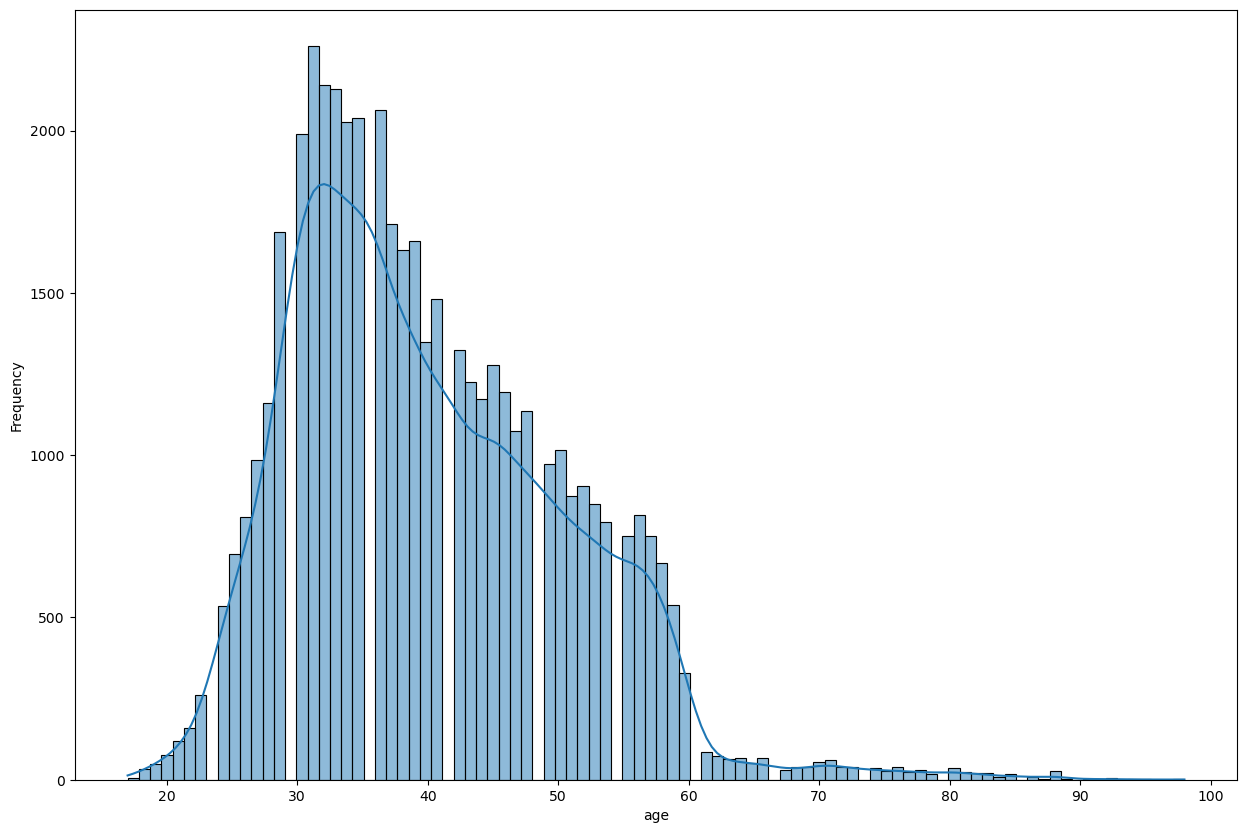

In [10]:
hist=plt.subplots(figsize=(15,10))
sns.histplot(data=clean_df,x='age',stat='frequency',kde=True)

#Age distribution plot shows ages 20 - 60 is a good age group to carry out the analysis


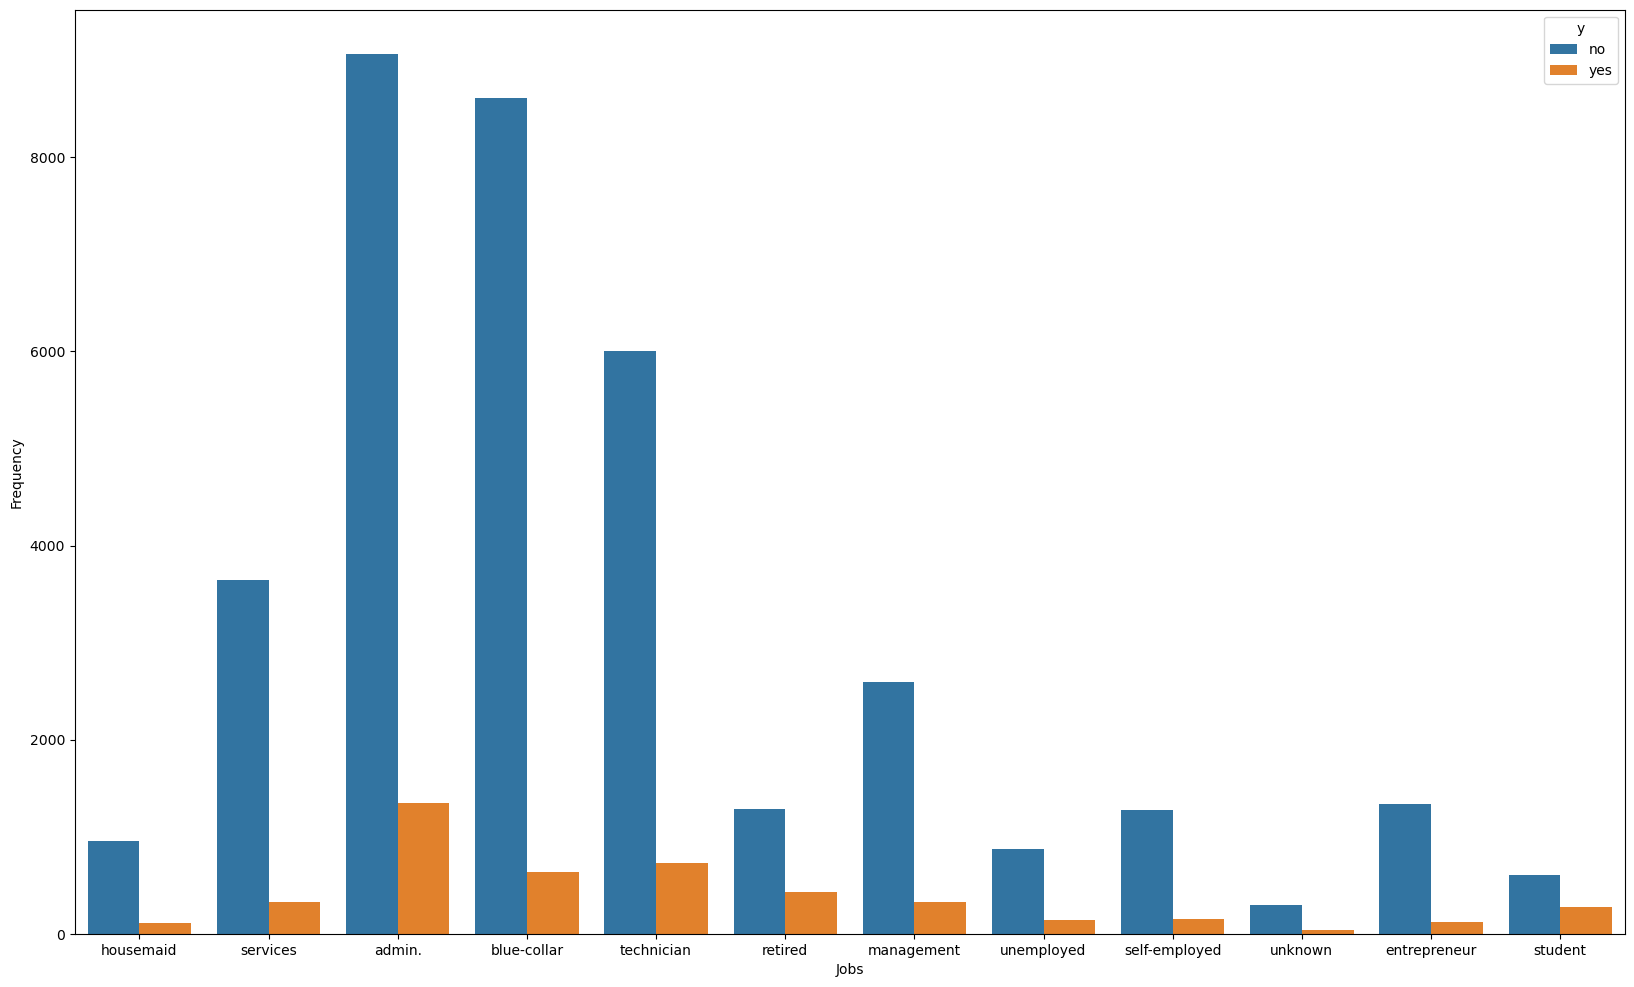

Counter({'admin.': 10419, 'blue-collar': 9253, 'technician': 6739, 'services': 3967, 'management': 2924, 'retired': 1718, 'entrepreneur': 1456, 'self-employed': 1421, 'housemaid': 1060, 'unemployed': 1014, 'student': 875, 'unknown': 330})


In [11]:
from collections import Counter
plt.figure(figsize=(20,12))
sns.countplot(x='job',data=clean_df,hue='y')
plt.xlabel("Jobs")
plt.ylabel("Frequency")
plt.show()
clean_df['job'].unique()
print(Counter(clean_df['job']))
#The job plot says that


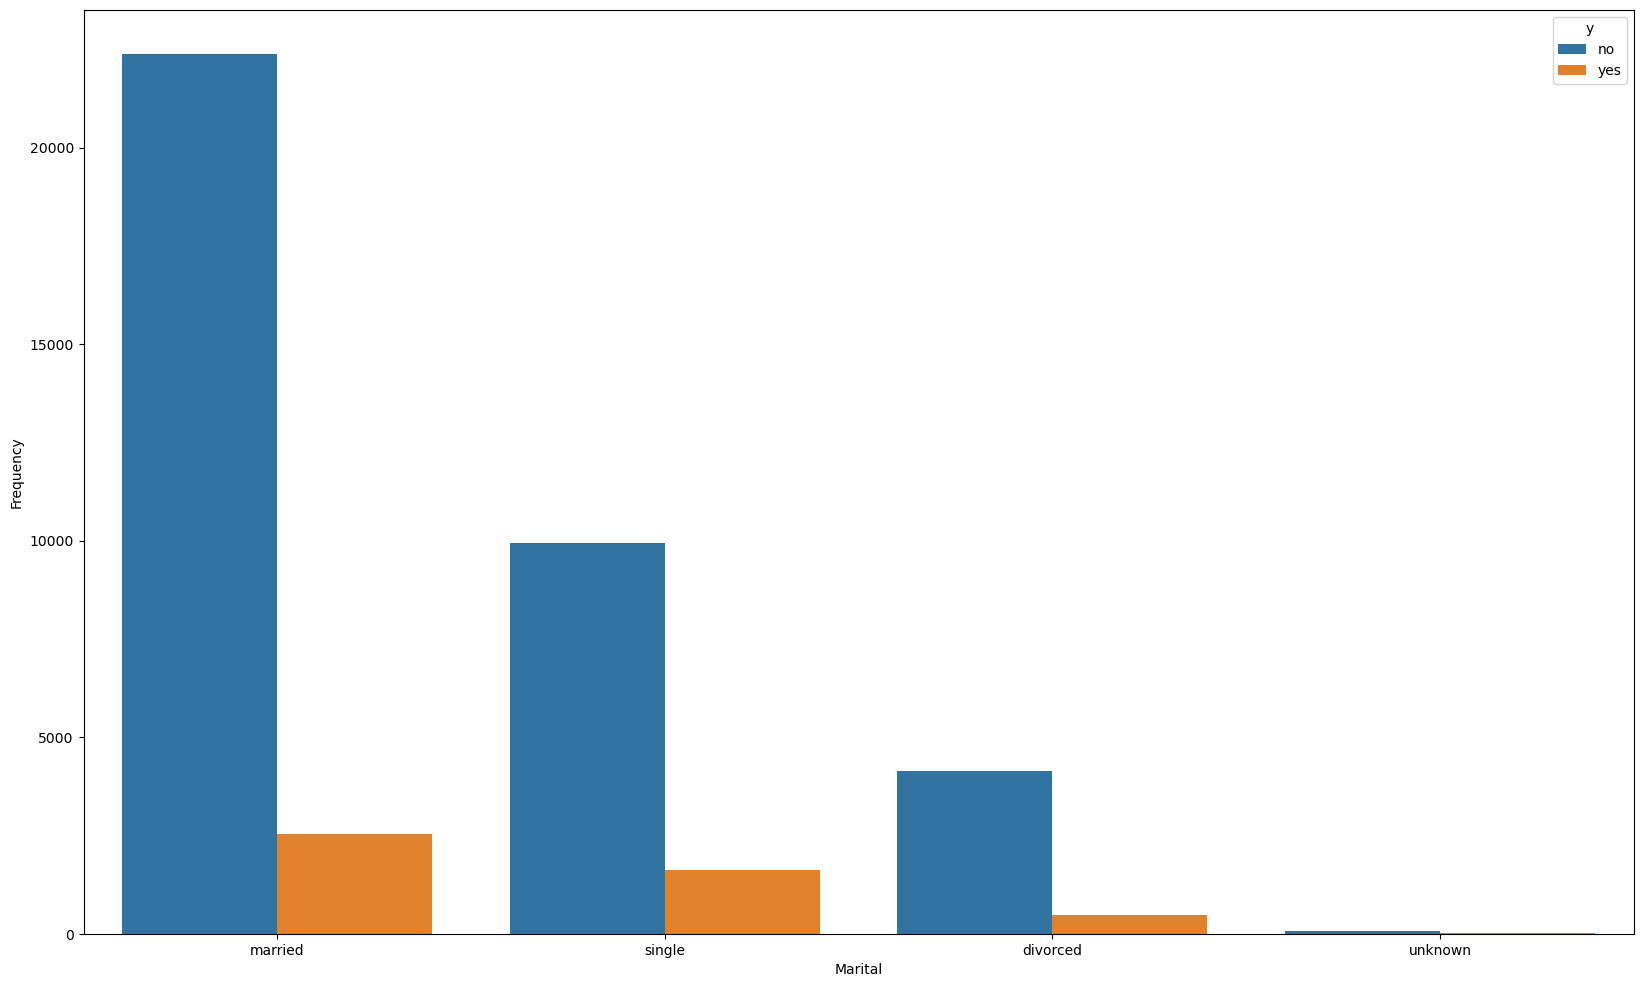

Counter({'married': 24921, 'single': 11564, 'divorced': 4611, 'unknown': 80})


In [12]:
plt.figure(figsize=(20,12))
sns.countplot(x='marital',data=clean_df,hue='y')
plt.xlabel("Marital")
plt.ylabel("Frequency")
plt.show()
clean_df['marital'].unique()
print(Counter(clean_df['marital']))

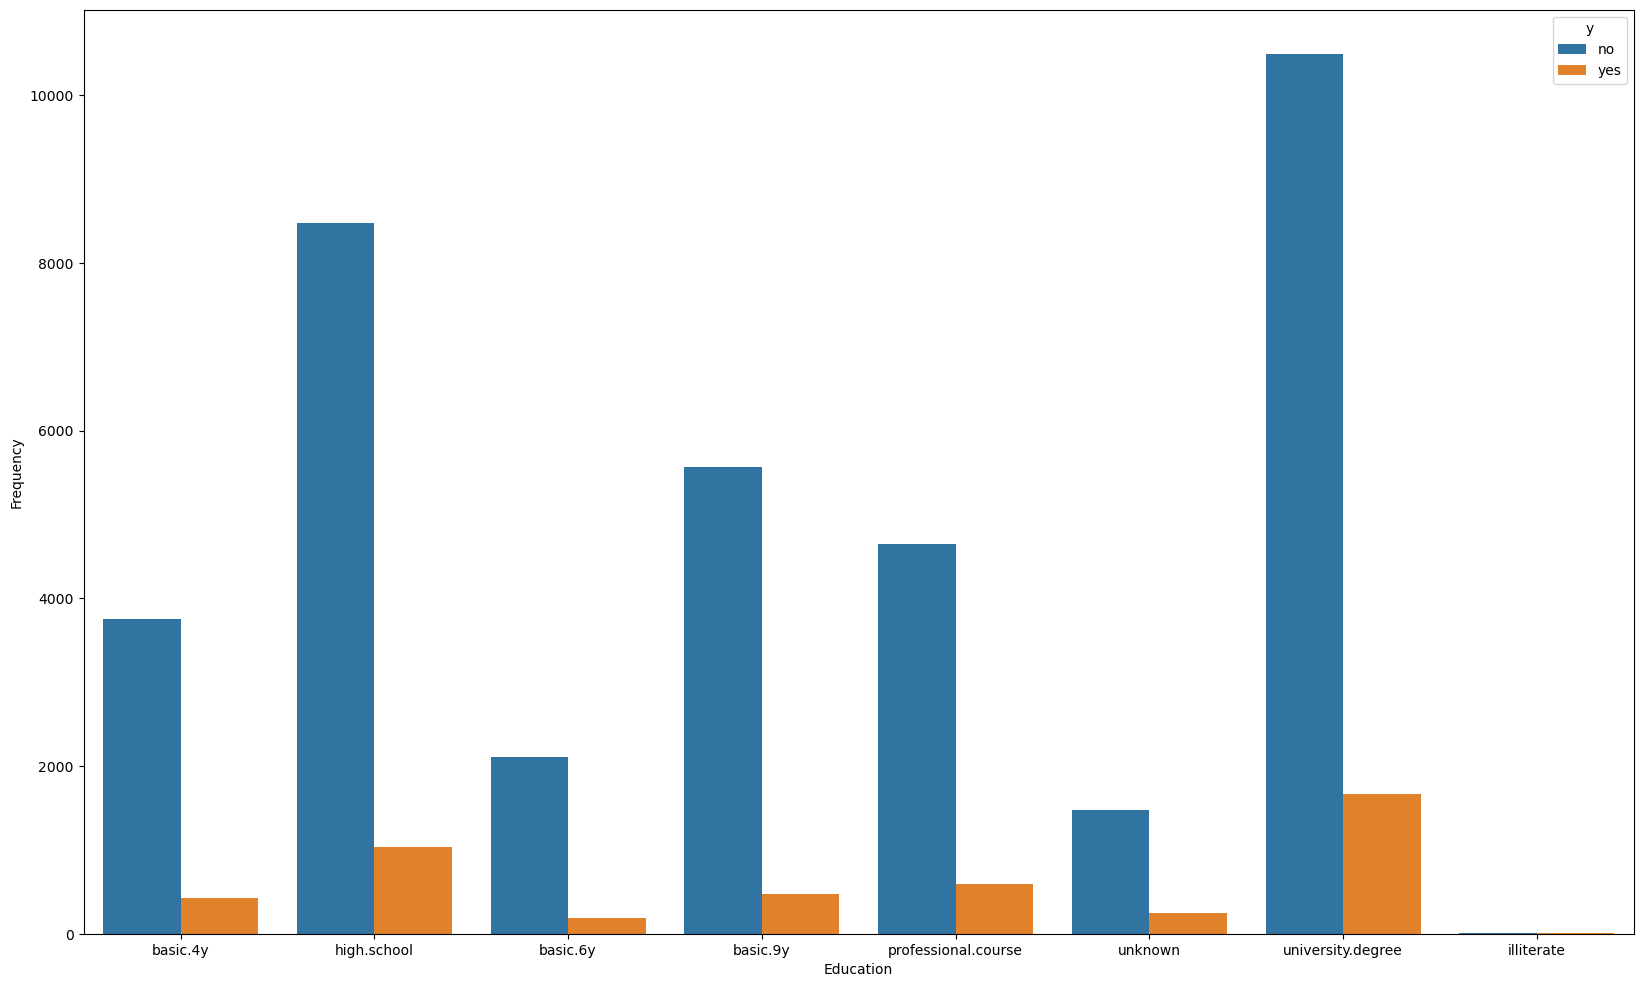

Counter({'university.degree': 12164, 'high.school': 9512, 'basic.9y': 6045, 'professional.course': 5240, 'basic.4y': 4176, 'basic.6y': 2291, 'unknown': 1730, 'illiterate': 18})


In [13]:
plt.figure(figsize=(20,12))
sns.countplot(x='education',data=clean_df,hue='y')
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.show()
clean_df['education'].unique()
print(Counter(clean_df['education']))
#People with University degree have to be targeted

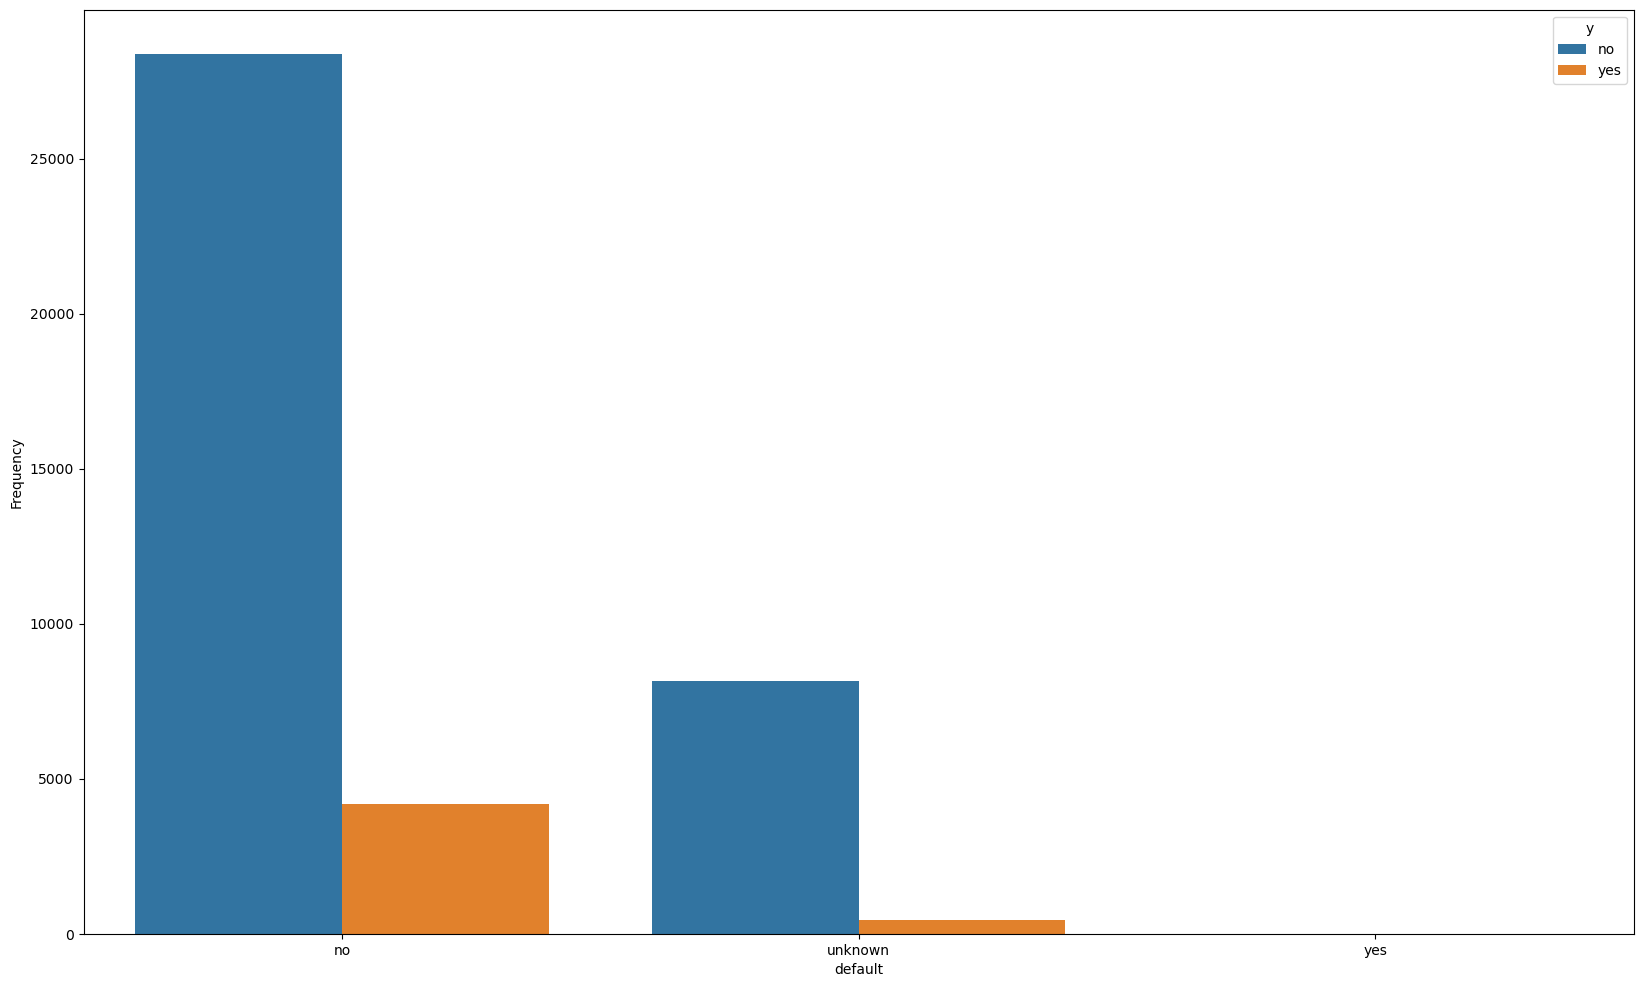

Counter({'no': 32577, 'unknown': 8596, 'yes': 3})


In [14]:
#4. default
plt.figure(figsize=(20,12))
sns.countplot(x='default',data=clean_df,hue='y')
plt.xlabel("default")
plt.ylabel("Frequency")
plt.show()
clean_df['default'].unique()
print(Counter(clean_df['default']))

#People who have not defaulted have a good possibility to say 'yes'

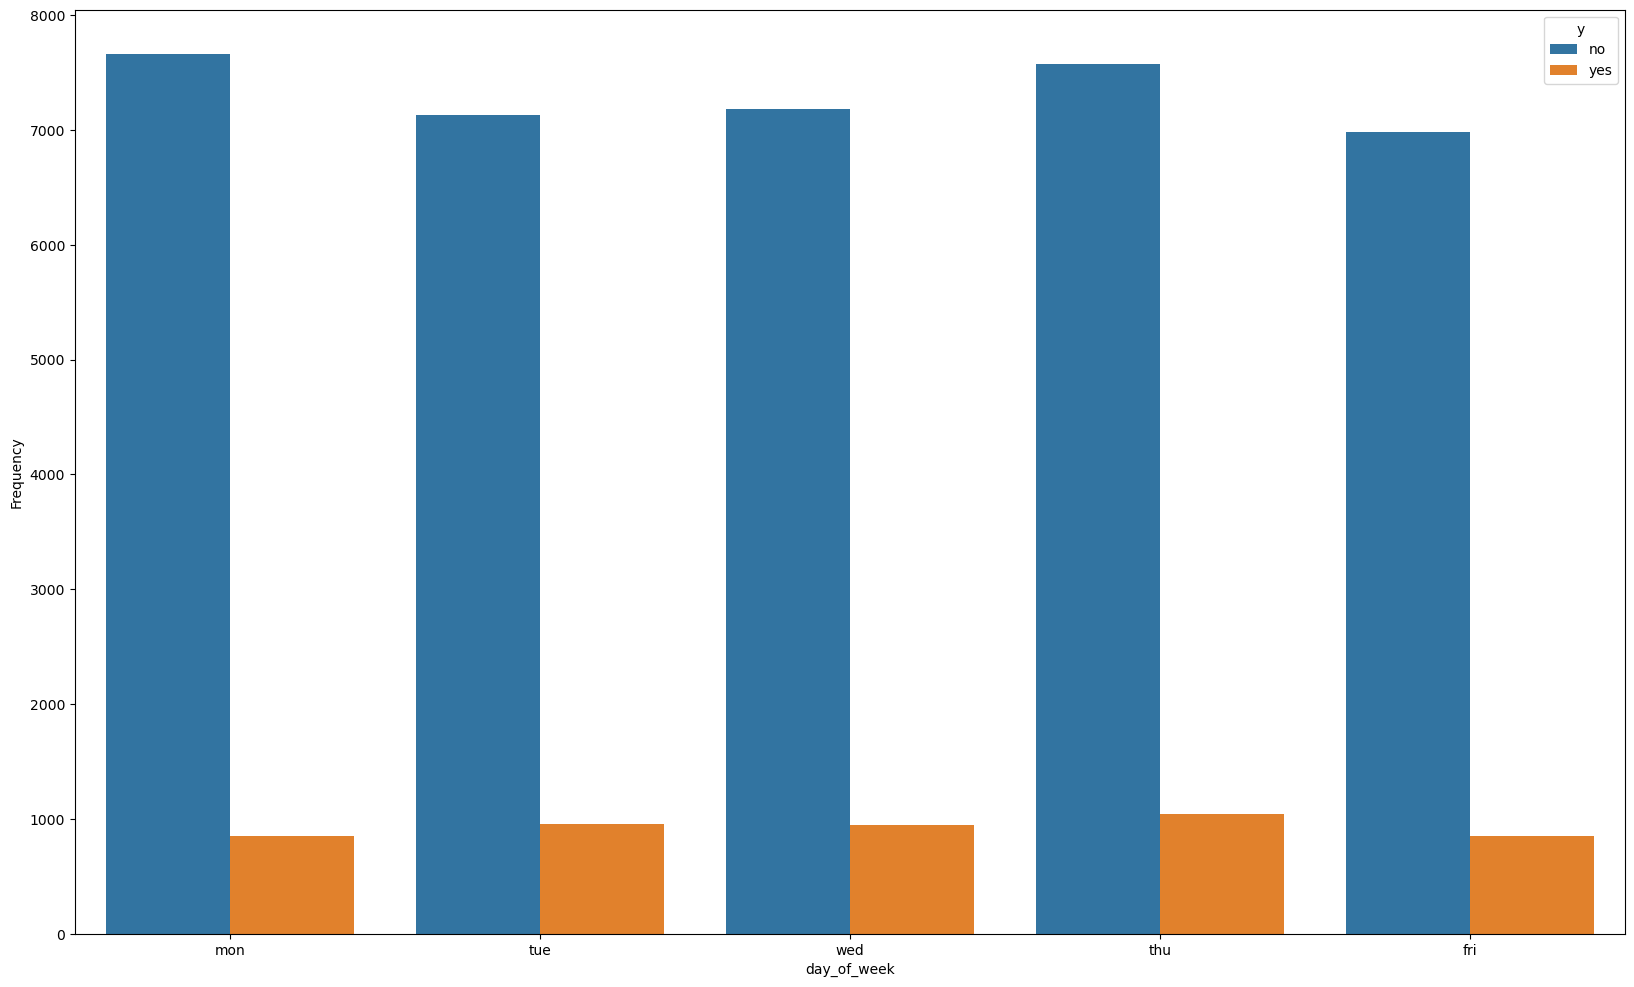

Counter({'thu': 8618, 'mon': 8512, 'wed': 8134, 'tue': 8086, 'fri': 7826})


In [15]:
plt.figure(figsize=(20,12))
sns.countplot(x='day_of_week',data=clean_df,hue='y')
plt.xlabel("day_of_week")
plt.ylabel("Frequency")
plt.show()
clean_df['day_of_week'].unique()
print(Counter(clean_df['day_of_week']))

#Looks like Monday and Thursday is a good day to get a yes

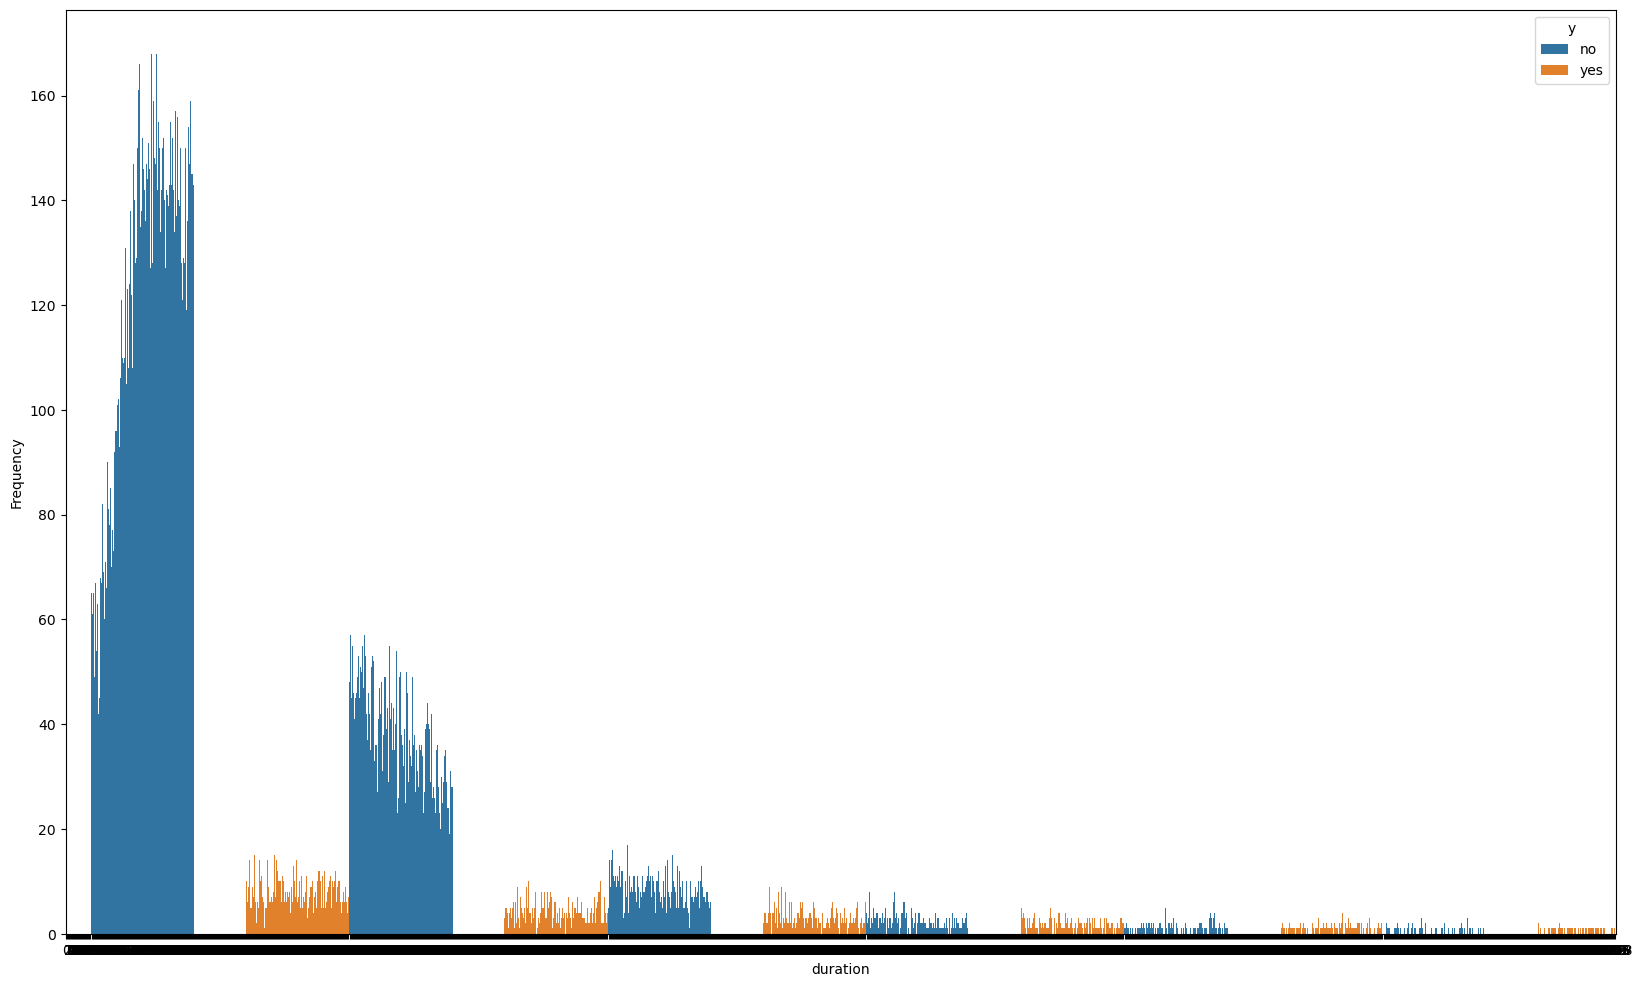

array([ 261,  149,  226, ..., 1246, 1556, 1868], dtype=int64)

In [16]:
plt.figure(figsize=(20,12))
sns.countplot(x='duration',data=clean_df,hue='y')
plt.xlabel("duration")
plt.ylabel("Frequency")
plt.show()
clean_df['duration'].unique()


Using an sns pairplot for some of the features

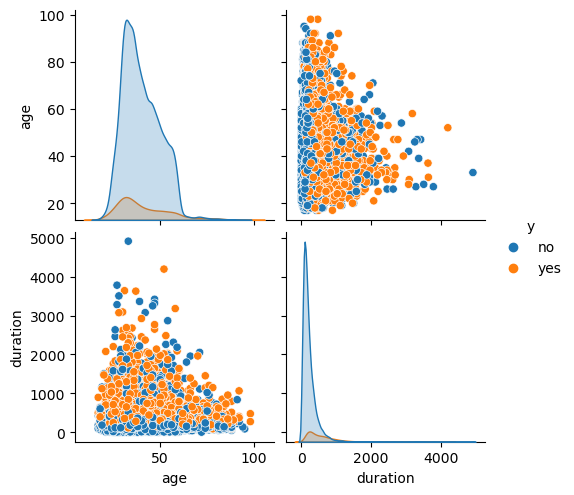

In [17]:
#SNS pairplot
sns.pairplot(data=clean_df,hue='y')
plt.show()

In [18]:
#75 - 25 train/test split
from sklearn.model_selection import train_test_split
X = clean_df.drop(columns='y')
y = clean_df['y']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
X_train.head(10)
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30882 entries, 10638 to 8181
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          30882 non-null  int64 
 1   job          30882 non-null  object
 2   marital      30882 non-null  object
 3   education    30882 non-null  object
 4   default      30882 non-null  object
 5   housing      30882 non-null  object
 6   loan         30882 non-null  object
 7   contact      30882 non-null  object
 8   month        30882 non-null  object
 9   day_of_week  30882 non-null  object
 10  duration     30882 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 2.8+ MB


In [19]:
y.tail(10)

41178    yes
41179     no
41180     no
41181    yes
41182     no
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, dtype: object

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from datetime import datetime


In [21]:
%%time
#Lets pick Logistic regression as a base model
#Peform one hot encoder on all the categorical features
#Use the numerical charactersistics as passthroughs 
#Then run logistic regression
ohe = OneHotEncoder()
column_trans = make_column_transformer((ohe,['job','marital','education','default','housing','loan','contact','month','day_of_week']),
                                        remainder='passthrough')
logr = LogisticRegression()
pipe = make_pipeline(column_trans,logr)
pipe.fit(X_train,y_train)




CPU times: total: 344 ms
Wall time: 347 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week'])])),
                ('logisticregression', LogisticRegression())])

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [22]:
#A simple logistic regression has been built above

### Problem 9: Score the Model

What is the accuracy of your model?

In [23]:
#Deermine the accuracy of the model
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
report = classification_report(y_test,y_pred)
print(f"Classification  report is as follows :\n {report} ")

acc_tr_lr = accuracy_score(y_train,y_train_pred)*100
acc_te_lr = accuracy_score(y_test,y_pred)*100

print(f"Accuracy of the model is {accuracy_score(y_test,y_pred)*100} ")
print(f"Accuracy of the training model is {accuracy_score(y_train,y_train_pred)*100} ")


Classification  report is as follows :
               precision    recall  f1-score   support

          no       0.91      0.98      0.94      9115
         yes       0.58      0.25      0.35      1179

    accuracy                           0.89     10294
   macro avg       0.75      0.62      0.65     10294
weighted avg       0.87      0.89      0.87     10294
 
Accuracy of the model is 89.3724499708568 
Accuracy of the training model is 90.12045851952594 


Accuracy of the model is 89.833% which is very good for a baseline.
Let's compare this with respect to a few other models.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [24]:
%%time
#Test the K neighbors classification with the default parameters
from sklearn.neighbors import KNeighborsClassifier 
ohe = OneHotEncoder()
column_trans = make_column_transformer((ohe,['job','marital','education','default','housing','loan','contact','month','day_of_week']),
                                        remainder='passthrough')

KNN=KNeighborsClassifier(n_neighbors=4)

pipe = make_pipeline(column_trans,KNN)
pipe.fit(X_train,y_train)


CPU times: total: 172 ms
Wall time: 185 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))])

In [25]:
y_pred=pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
report = classification_report(y_test,y_pred)
print(f"Classification  report is as follows :\n {report} ")

acc_tr_knn = accuracy_score(y_train,y_train_pred)*100
acc_te_knn = accuracy_score(y_test,y_pred)*100

print(f"Accuracy of the training model is {accuracy_score(y_train,y_train_pred)*100} ")
print(f"Accuracy of the model is {accuracy_score(y_test,y_pred)*100} ")


Classification  report is as follows :
               precision    recall  f1-score   support

          no       0.90      0.98      0.94      9115
         yes       0.50      0.17      0.25      1179

    accuracy                           0.89     10294
   macro avg       0.70      0.57      0.60     10294
weighted avg       0.86      0.89      0.86     10294
 
Accuracy of the training model is 91.23113787967101 
Accuracy of the model is 88.57586943850787 


In [26]:
%%time
#SVM model evaluation
from sklearn.svm import SVC
ohe = OneHotEncoder()
column_trans = make_column_transformer((ohe,['job','marital','education','default','housing','loan','contact','month','day_of_week']),
                                        remainder='passthrough')

svc_model=SVC()

pipe = make_pipeline(column_trans,svc_model)
pipe.fit(X_train,y_train)


CPU times: total: 37.6 s
Wall time: 37.7 s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week'])])),
                ('svc', SVC())])

In [27]:
y_pred=pipe.predict(X_test)
print(f"Accuracy of the model is {accuracy_score(y_test,y_pred)*100} ")
y_train_pred = pipe.predict(X_train)
print(f"Accuracy of the training model is {accuracy_score(y_train,y_train_pred)*100} ")

report = classification_report(y_test,y_pred)
print(f"\nClassification  report is as follows :\n {report} ")

acc_tr_svc = accuracy_score(y_train,y_train_pred)*100
acc_te_svc = accuracy_score(y_test,y_pred)*100

Accuracy of the model is 88.89644453079464 
Accuracy of the training model is 89.56026164108543 

Classification  report is as follows :
               precision    recall  f1-score   support

          no       0.90      0.98      0.94      9115
         yes       0.55      0.16      0.25      1179

    accuracy                           0.89     10294
   macro avg       0.73      0.57      0.59     10294
weighted avg       0.86      0.89      0.86     10294
 


Decision Tree

In [28]:
%%time
#Decision tree classifier with the default parameters
from sklearn.tree import DecisionTreeClassifier
ohe = OneHotEncoder()
column_trans = make_column_transformer((ohe,['job','marital','education','default','housing','loan','contact','month','day_of_week']),
                                        remainder='passthrough')

dtree=DecisionTreeClassifier(criterion='entropy')

pipe = make_pipeline(column_trans,dtree)
pipe.fit(X_train,y_train)


CPU times: total: 1.39 s
Wall time: 1.4 s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy'))])

In [29]:
print(f"Accuracy of the model is {accuracy_score(y_test,y_pred)*100} ")
y_train_pred = pipe.predict(X_train)
print(f"Accuracy of the training model is {accuracy_score(y_train,y_train_pred)*100} ")

report = classification_report(y_test,y_pred)
print(f"\nClassification  report is as follows :\n {report} ")

acc_tr_dt = accuracy_score(y_train,y_train_pred)*100
acc_te_dt = accuracy_score(y_test,y_pred)*100

Accuracy of the model is 88.89644453079464 
Accuracy of the training model is 100.0 

Classification  report is as follows :
               precision    recall  f1-score   support

          no       0.90      0.98      0.94      9115
         yes       0.55      0.16      0.25      1179

    accuracy                           0.89     10294
   macro avg       0.73      0.57      0.59     10294
weighted avg       0.86      0.89      0.86     10294
 


Lets compare all the models creating a data frame

In [30]:
#Build a data frame with the necessary parameters to display
model_data = [
                ('Logistic_Regression',acc_tr_lr,acc_te_lr,'406 ms'),
                ('KNN',acc_tr_knn,acc_te_knn,'297 ms'),
                ('SVM',acc_tr_svc,acc_te_svc, '36500 ms'),
                ('Decision_Tree',acc_tr_dt,acc_te_dt,'1180 ms'),
             ]
model_comp = pd.DataFrame(model_data,columns=['Model_Name','Training_Accuracy','Testing_Accuracy','Train_time'])
model_comp

,Model_Name,Training_Accuracy,Testing_Accuracy,Train_time
0,Logistic_Regression,90.120459,89.372450,406 ms
1,KNN,91.231138,88.575869,297 ms
2,SVM,89.560262,88.896445,36500 ms
3,Decision_Tree,100.000000,88.896445,1180 ms


This above table is a beautiful description of all the models side by side.
From the table, a logistic regression is the quickest to solve and SVM takes the maximum time of around 30.5 s.
Decision tree on the other takes under a second and has the highest training accuracy but it looks to be overfitted because the testing accuracy us similar to the other models.

The training and testing accuracy is very similar on SVM.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [31]:
%%time
#PErform the grid-search algorithm to determine the best amount of n-neighbors
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV


ohe = OneHotEncoder()
column_trans = make_column_transformer((ohe,['job','marital','education','default','housing','loan','contact','month','day_of_week']),
                                        remainder='passthrough')

KNN=KNeighborsClassifier()
knn_params = [{"n_neighbors":[3,4,5,7]}]
grid_search = GridSearchCV(KNN,param_grid=knn_params,scoring='accuracy')


pipe = make_pipeline(column_trans,grid_search)
#pipe = make_pipeline(column_trans,KNN)
pipe.fit(X_train,y_train)
y_train_pred = pipe.predict(X_train)

grid_search.best_estimator_


CPU times: total: 16min 53s
Wall time: 1min 14s


KNeighborsClassifier(n_neighbors=7)

In [32]:
#Now check the score with n_neighbors as 7
y_test_pred = pipe.predict(X_test)
print(accuracy_score(y_test,y_test_pred)*100)

88.46901107441228


In [33]:
#Hence with the number of n_neighbors increased th 7, we slightly imporoved the accuracy to 89%
#Thus, n_neighbors greater than 4 doesn't yield too high of a return

In [34]:
ohe = OneHotEncoder()
column_trans = make_column_transformer((ohe,['job','marital','education','default','housing','loan','contact','month','day_of_week']),
                                        remainder='passthrough')

dtree=DecisionTreeClassifier(criterion='entropy')
dtree_params = [{"max_depth":[2,3,4,5]}]
grid_search = GridSearchCV(dtree,param_grid=dtree_params,scoring='accuracy')

pipe = make_pipeline(column_trans,grid_search)
pipe.fit(X_train,y_train)

grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [35]:
#Now check the score with max_depth of 5
y_test_pred = pipe.predict(X_test)
print(accuracy_score(y_test,y_test_pred)*100)

89.3724499708568


In [36]:
#With max_depth of the tree set to 5, we are able to achieve an accuracy of 89.55. That is atleast a one point improvement
#compared to the default depth tree

By comparing the four classifiers, here are the basic observations
1. KNN takes the lowest amount of time
2. SVM takes the highest amount of time
3. Decision tree has a 100% training accuracy but the accuracy drops on the testing data
4. However an average accuracy rate of 90% was found on the testing data across all the classifiers
5. Logistic regression takes the lowest amount of time and is useful for simpler cases
6. For KNN, despite increasing the n_neighbors the increase in percentage is very little. Hence we run the risk of over-fitting.
7. Like-wise, increasing the max_depth increases the accuracy percentage but not by a lot, hence we run the risk of over-fitting.

********************************************************************************************************
                                                Findings
********************************************************************************************************
This data set is a result of 17 campaigns that happened over a 2 and a half year time-period between May 2008 and November 2010.
Also, the Portuguese bank used a couple of marketing methods
  1. Phone calls to the consumers
  2. Internet online banking

The claim is this data targeted around 69,000 clients with a success rate of around 8%. 

As seen above, we identified key set of features to determine if a person would deposit. Some of the features were
 0   age       
 1   job          
 2   marital      
 3   education    
 4   default     
 5   housing      
 6   loan         
 7   contact     
 8   month       
 9   day_of_week  
 10  duration   

All of the other features were eliminated to simplify the task of modelling.
All of the categorical features were encoded by one hot encoding before using pipeline to transform and fit the data.

4 different classification methods KNN, Decision Tree, Logistic Regression, and SVM were used. 
They were found to operate with an accuracy score of around 90%.

Again tuning of hyper parameters was performed to optimize the scores with the use of GridSearch CV. KNN and Decision Tree's
accuracy score slightly went up.

Thus with these objectives in mind we are able to clearly determine if a client would make deposits in the bank or not.
We have all of the parameters to know which client to target to maximie the chances of acceptance.


##### Questions